##1. Train an AdaBoost Classifier on a Sample dataset and print model accuracy.

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost.fit(X_train, y_train)

y_pred = adaboost.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.93


##2. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).


In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeRegressor(max_depth=4)
adaboost_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=50, learning_rate=0.5, random_state=42)

adaboost_regressor.fit(X_train, y_train)

y_pred = adaboost_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 0.65


##3. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

Feature Importance:
                     Feature  Importance
7       mean concave points    0.450528
27     worst concave points    0.240103
20             worst radius    0.075589
22          worst perimeter    0.051408
21            worst texture    0.039886
23               worst area    0.038245
1              mean texture    0.027805
26          worst concavity    0.018725
16          concavity error    0.013068
13               area error    0.008415
10             radius error    0.006870
24         worst smoothness    0.004811
19  fractal dimension error    0.004224
11            texture error    0.003604
5          mean compactness    0.002996
15        compactness error    0.002511
4           mean smoothness    0.002467
17     concave points error    0.002038
28           worst symmetry    0.001478
12          perimeter error    0.001157
6            mean concavity    0.000922
18           symmetry error    0.000703
14         smoothness error    0.000556
8             mean 

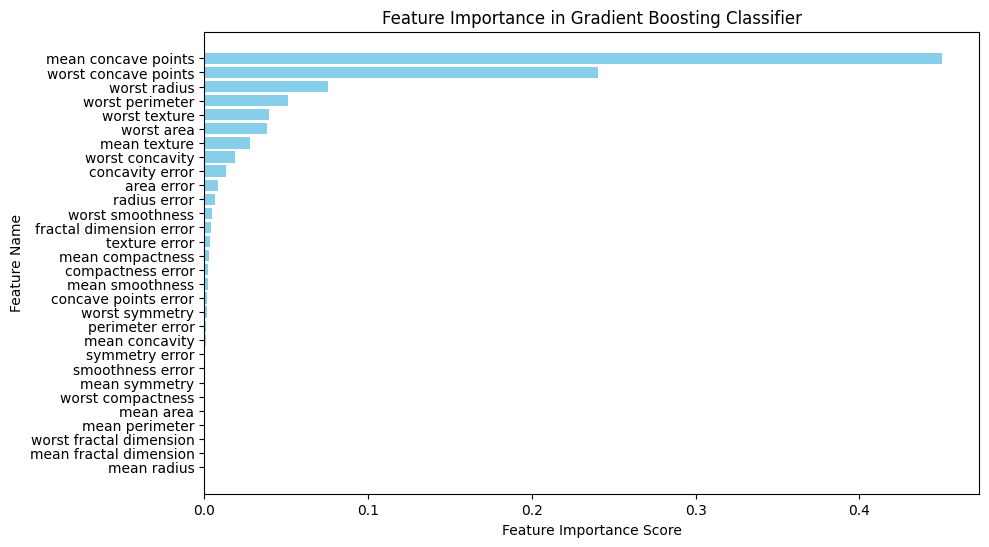

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

feature_importance = gb_classifier.feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Sort by importance

print("Feature Importance:\n", importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Name')
plt.title('Feature Importance in Gradient Boosting Classifier')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


##4. Train a Gradient Boosting Regressor and evaluate using R-Squared Score.


In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_regressor.fit(X_train, y_train)

y_pred = gb_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.2f}")


R-Squared Score: 0.78


##5. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting4


In [5]:
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_gb = gb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"XGBoost Classifier Accuracy: {accuracy_xgb:.2f}")
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.2f}")


XGBoost Classifier Accuracy: 0.96
Gradient Boosting Classifier Accuracy: 0.96


##6. Train a CatBoost Classifier and evaluate using F1-Score.


In [6]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.6 MB/s eta 0:00:00


In [7]:
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost_classifier.fit(X_train, y_train)

y_pred = catboost_classifier.predict(X_test)

f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")


F1-Score: 0.97


##7. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).


In [8]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.30


##8. Train an AdaBoost Classifier and visualize feature importance.


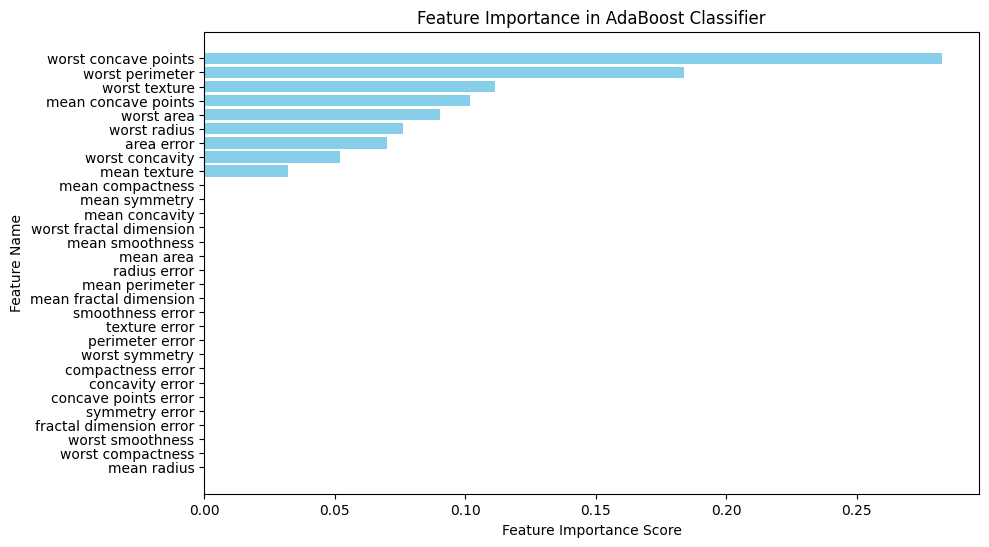

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=0.1, random_state=42)
adaboost_classifier.fit(X_train, y_train)

feature_importance = adaboost_classifier.feature_importances_

sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center', color='skyblue')
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in AdaBoost Classifier")
plt.gca().invert_yaxis()
plt.show()


##9.Train a Gradient Boosting Regressor and plot learning curves.


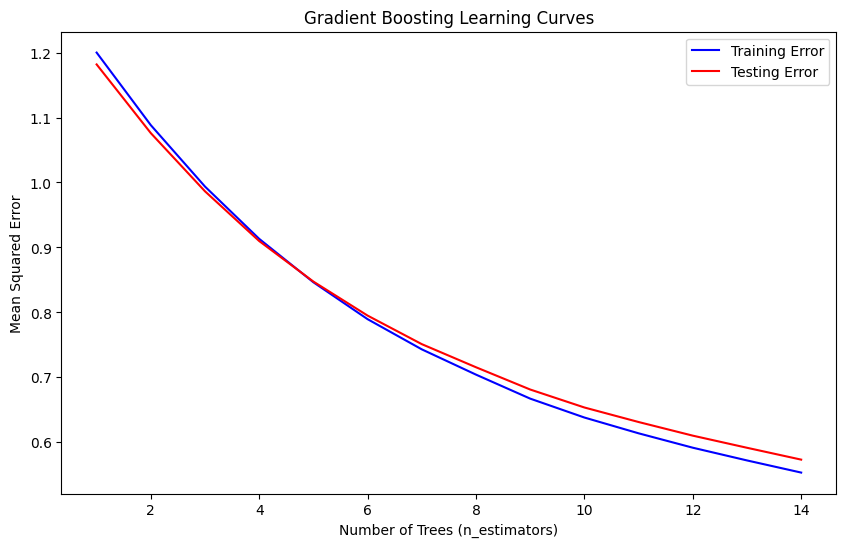

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

train_errors = []
test_errors = []

for n in range(1, 15):
    gb_regressor.set_params(n_estimators=n)
    gb_regressor.fit(X_train, y_train)

    y_train_pred = gb_regressor.predict(X_train)
    y_test_pred = gb_regressor.predict(X_test)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), train_errors, label="Training Error", color="blue")
plt.plot(range(1, 15), test_errors, label="Testing Error", color="red")
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error")
plt.title("Gradient Boosting Learning Curves")
plt.legend()
plt.show()


##10. Train an XGBoost Classifier and visualize feature importance.


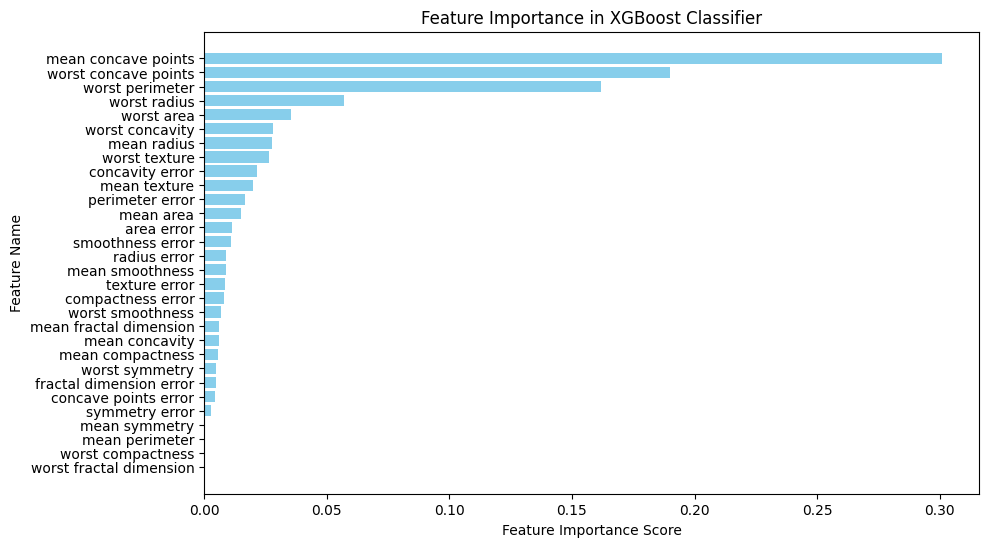

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_classifier.fit(X_train, y_train)

feature_importance = xgb_classifier.feature_importances_

sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center', color='skyblue')
plt.yticks(range(len(feature_importance)), np.array(feature_names)[sorted_indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Name")
plt.title("Feature Importance in XGBoost Classifier")
plt.gca().invert_yaxis()
plt.show()


##11. Train a CatBoost Classifier and plot the confusion matrix.


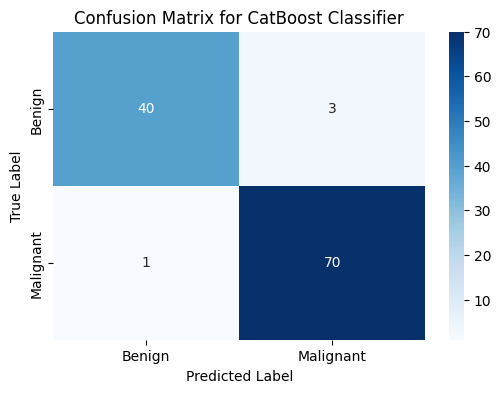

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_classifier = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost_classifier.fit(X_train, y_train)

y_pred = catboost_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()


##12. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.


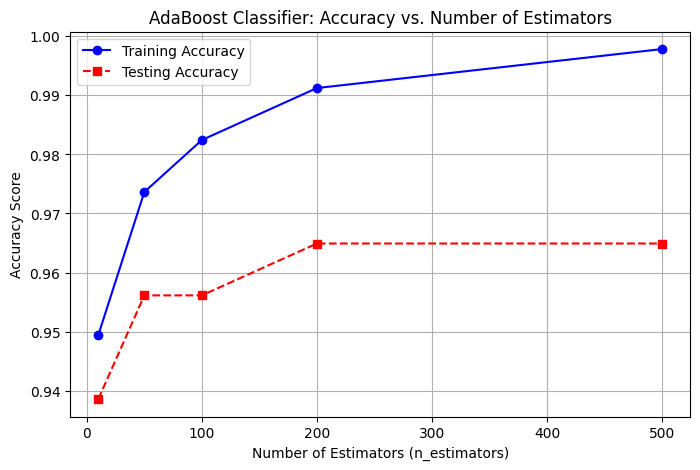

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_list = [10, 50, 100, 200, 500]  # Different estimator values
train_accuracies = []
test_accuracies = []

for n in n_estimators_list:
    model = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=n, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, train_accuracies, marker='o', linestyle='-', label="Training Accuracy", color="blue")
plt.plot(n_estimators_list, test_accuracies, marker='s', linestyle='--', label="Testing Accuracy", color="red")
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy Score")
plt.title("AdaBoost Classifier: Accuracy vs. Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()


##13. Train a Gradient Boosting Classifier and visualize the ROC curve.


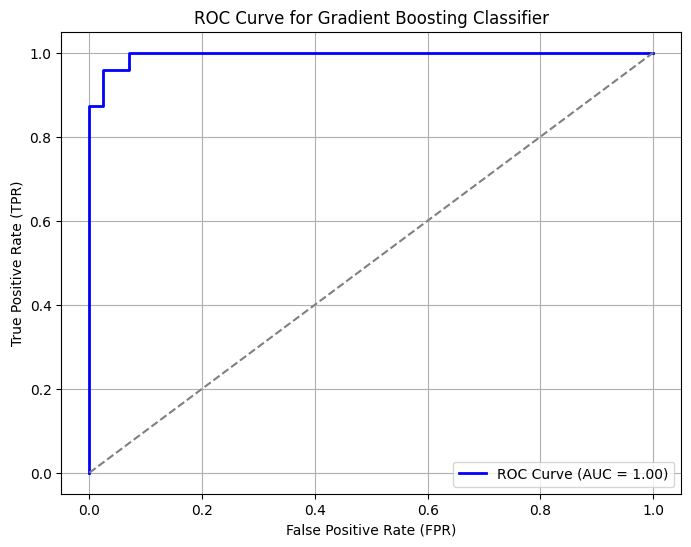

In [18]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train, y_train)

y_scores = gb_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random model)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Gradient Boosting Classifier")
plt.legend()
plt.grid(True)
plt.show()


##14. Train an XGBoost Regressor and tune the learning rate using GridSearchCV.


In [20]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=3, random_state=42)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_learning_rate = grid_search.best_params_['learning_rate']
print(f"Best Learning Rate: {best_learning_rate}")

best_model = xgb.XGBRegressor(n_estimators=100, learning_rate=best_learning_rate, max_depth=3, random_state=42)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) with best learning rate: {mse:.4f}")


Best Learning Rate: 0.3
Mean Squared Error (MSE) with best learning rate: 0.2510


##15. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from collections import Counter

X, y = make_classification(n_samples=5000, n_features=20, n_classes=2, weights=[0.9, 0.1], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model_no_weights = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)

print("Performance Without Class Weights:")
print(classification_report(y_test, y_pred_no_weights))

class_counts = Counter(y_train)
class_weights = {0: len(y_train) / (2 * class_counts[0]), 1: len(y_train) / (2 * class_counts[1])}

model_with_weights = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, class_weights=class_weights, random_state=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)

print("Performance With Class Weights:")
print(classification_report(y_test, y_pred_with_weights))

f1_no_weights = f1_score(y_test, y_pred_no_weights)
f1_with_weights = f1_score(y_test, y_pred_with_weights)

print(f"F1-Score Without Class Weights: {f1_no_weights:.4f}")
print(f"F1-Score With Class Weights: {f1_with_weights:.4f}")


Performance Without Class Weights:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       895
           1       0.85      0.73      0.79       105

    accuracy                           0.96      1000
   macro avg       0.91      0.86      0.88      1000
weighted avg       0.96      0.96      0.96      1000

Performance With Class Weights:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       895
           1       0.72      0.80      0.76       105

    accuracy                           0.95      1000
   macro avg       0.85      0.88      0.86      1000
weighted avg       0.95      0.95      0.95      1000

F1-Score Without Class Weights: 0.7857
F1-Score With Class Weights: 0.7568


##16. Train an AdaBoost Classifier and analyze the effect of different learning rates.


Learning Rate: 0.001, Accuracy: 0.8947
Learning Rate: 0.01, Accuracy: 0.9386
Learning Rate: 0.1, Accuracy: 0.9561
Learning Rate: 0.5, Accuracy: 0.9649
Learning Rate: 1.0, Accuracy: 0.9649
Learning Rate: 2.0, Accuracy: 0.7719


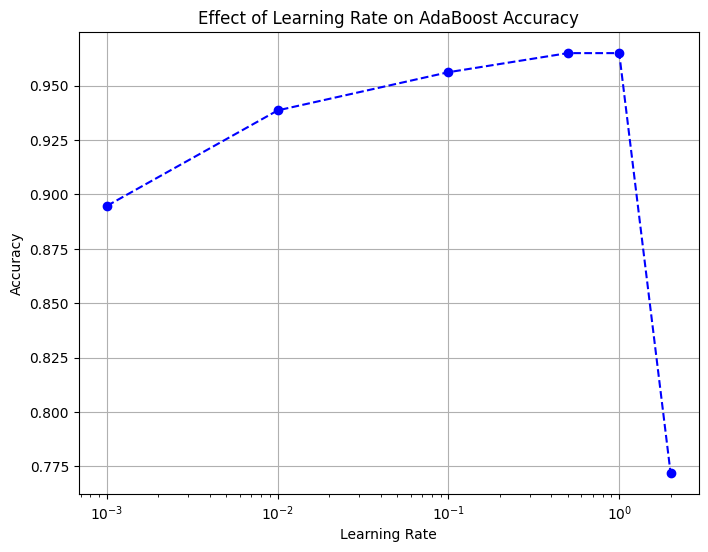

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
accuracy_scores = []

for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=50, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(learning_rates, accuracy_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate on AdaBoost Accuracy")
plt.xscale("log")
plt.grid(True)
plt.show()


##17. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.


In [25]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = xgb.XGBClassifier(objective="multi:softprob", num_class=3, n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)

print(f"Log-Loss: {logloss:.4f}")


Log-Loss: 0.2581
